In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats



In [5]:
# Load cleaned datasets
benin = pd.read_csv("../data/benin_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")
sierraleone = pd.read_csv("../data/sierraleone_clean.csv")


In [7]:
# Add country column to each
benin["Country"] = "Benin"
togo["Country"] = "Togo"
sierraleone["Country"] = "Sierra Leone"

# Combine into a single DataFrame
df_all = pd.concat([benin, togo, sierraleone], ignore_index=True)

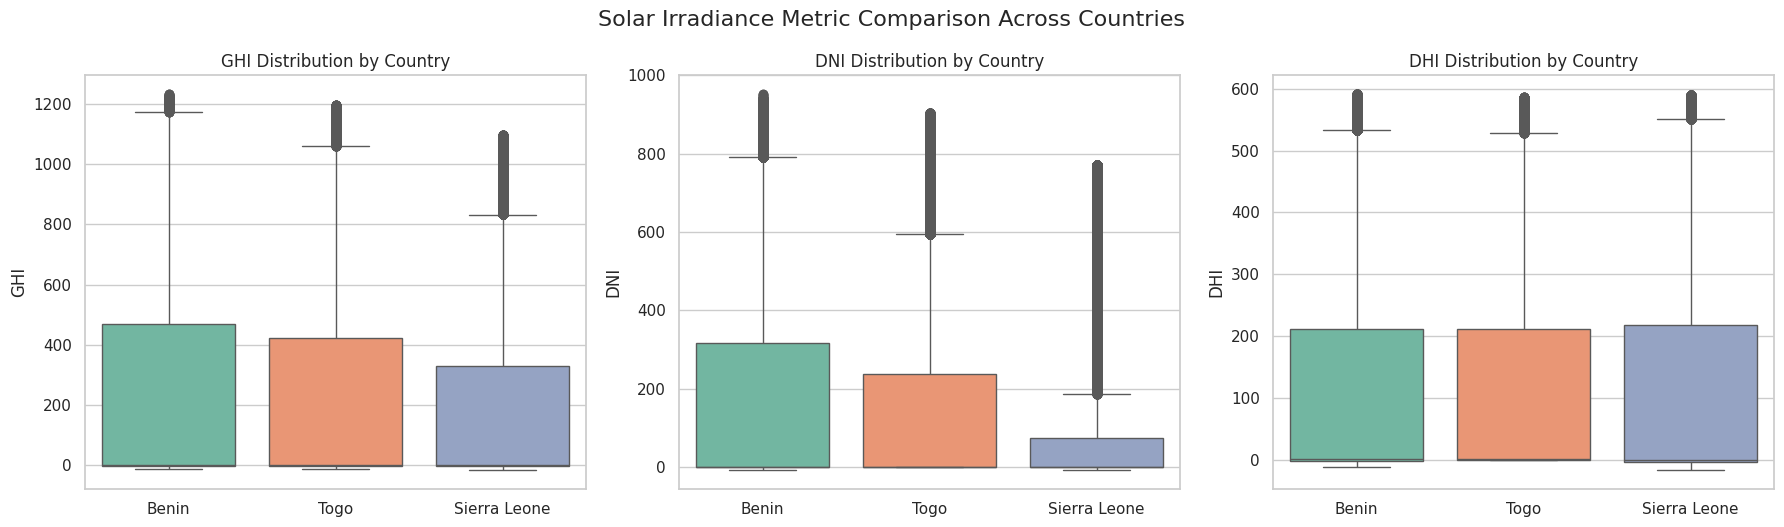

In [ ]:
# Metric Comparison

sns.set(style="whitegrid")

plt.figure(figsize=(18, 5))

for i, metric in enumerate(["GHI", "DNI", "DHI"]):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df_all, x="Country", y=metric, hue="Country", palette="Set2", legend=False)
    plt.title(f"{metric} Distribution by Country")
    plt.xlabel("")
    plt.ylabel(metric)

plt.tight_layout()
plt.suptitle("Solar Irradiance Metric Comparison Across Countries", fontsize=16, y=1.05)
plt.show()

In [23]:
# Summary Table (Mean, Median, Std)

summary_stats = df_all.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])
summary_stats.round(2)
summary_stats.style.background_gradient(cmap="Blues", axis=None)


### 🔍 Key Observations from GHI, DNI, and DHI Summary Table

- **Benin**  
  - Highest **mean GHI**: **236.23**  
  - Greatest **GHI variability**: **std = 328.29**  
  - 🔆 Indicates large fluctuations in solar irradiance  

- **Togo**  
  - Most stable **DHI median**: **1.5**  
  - ⚖️ Suggests consistent diffuse solar irradiance  
  - Maintains relatively high GHI mean  

- **Sierra Leone**  
  - Negative **GHI median**: **-0.4**  
  - Negative **DHI median**: **-0.6**  
  - ⚠️ May indicate data quality issues or anomalies


In [24]:
from scipy.stats import f_oneway, kruskal

ghi_benin = benin["GHI"].dropna()
ghi_togo = togo["GHI"].dropna()
ghi_sl = sierraleone["GHI"].dropna()

# One-way ANOVA
f_stat, p_val_anova = f_oneway(ghi_benin, ghi_togo, ghi_sl)
print("One-way ANOVA - F-statistic:", f_stat, "P-value:", p_val_anova)

# Kruskal–Wallis test
h_stat, p_val_kruskal = kruskal(ghi_benin, ghi_togo, ghi_sl)
print("Kruskal–Wallis - H-statistic:", h_stat, "P-value:", p_val_kruskal)

One-way ANOVA - F-statistic: 3833.1842028139195 P-value: 0.0
Kruskal–Wallis - H-statistic: 6548.533789026684 P-value: 0.0


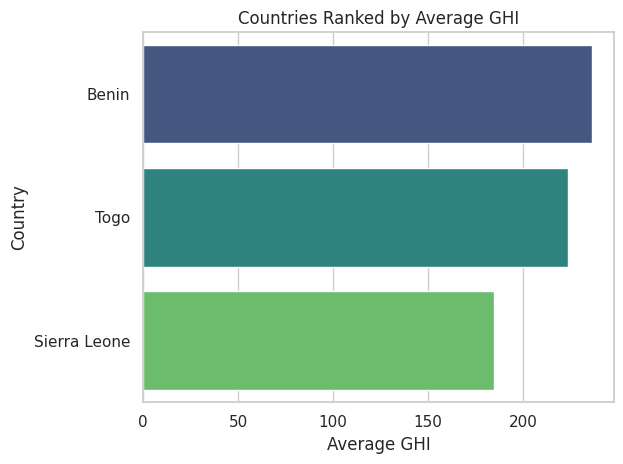

In [26]:
# Visual Summary

# Calculate average GHI per country
avg_ghi = df_all.groupby("Country")["GHI"].mean().sort_values(ascending=False).reset_index()

# Plot bar chart with hue and no legend
sns.barplot(data=avg_ghi, x="GHI", y="Country", hue="Country", palette="viridis", legend=False)

plt.xlabel("Average GHI")
plt.ylabel("Country")
plt.title("Countries Ranked by Average GHI")
plt.tight_layout()
plt.show()